In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

# set color cycle to gradient
# mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=plt.cm.viridis(np.linspace(0.5, 1, 5)))

In [3]:
import pandas as pd

# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Relevant?',
    'Time Complexity Class',
    'Approximation Factor Class (Mult)', 
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',	
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)',
    'Parallel?',
    'Quantum?'
]
approximation_algorithms = pd.read_csv('approximation_algorithms.csv', usecols=columns)

sheet1_columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Time Complexity Class',
    'Parallel?',
    'Quantum?',
    'Approximate?',
    'Exact Problem Statement?'
]
sheet1 = pd.read_csv('sheet1.csv', usecols=sheet1_columns)

sheet1 = sheet1[sheet1['Approximate?'] != '1']
sheet1 = sheet1[sheet1['Approximate?'] != 1]
sheet1 = sheet1[sheet1['Exact Problem Statement?'] != '0']
sheet1 = sheet1[sheet1['Exact Problem Statement?'] != 0]
sheet1 = sheet1.dropna(subset=['Family Name'])
sheet1[ 'Approximation Factor Class (Mult)' ] = 0
sheet1[ 'Approximation Factor Class (Add)' ] = 0
print(sheet1['Family Name'].nunique())

sheet1['sheet1'] = 1   
excluded_families = ['Self-Balancing Trees Creation', 'Self-Balancing Trees Insertion', 'Self-Balancing Trees Deletion', 'Self-Balancing Trees Search', 'Mutual Exclusion']
for family in excluded_families:
    sheet1 = sheet1[sheet1['Family Name'] != family]
    

# drop Relevant? == 0
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != 0]
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != '0']


# concatenate the two sheets
# approximation_algorithms = pd.concat([approximation_algorithms, sheet1], ignore_index=True)



# Clean and prepare the data
# drop Looked at? == 0.001
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0.001']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0']


# filter out parallel algorithms
approximation_algorithms = approximation_algorithms[approximation_algorithms['Parallel?'] != '1']

approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != '1']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != 1]



approximation_algorithms['Year'] = pd.to_numeric(approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)
print(approximation_algorithms['Family Name'].nunique())

for col in ['Time Complexity Class', 'Approximation Factor Class (Mult)', 'Approximation Factor Class (Add)']:
    # Extract complete numbers from the string including the decimal part
    approximation_algorithms[col] = pd.to_numeric(approximation_algorithms[col].astype(str).str.extract(r'(\d+\.\d+|\d+)')[0], errors='coerce')
    approximation_algorithms[col] = approximation_algorithms[col].replace(0, 99999)

# Sort the DataFrame for correct group-wise comparison
approximation_algorithms.sort_values(by=['Family Name', 'Variation', 'Year'], inplace=True)


approximation_algorithms['Improvement'] = 0
# Identify improvements
def identify_improvements(group):
    # Ensure necessary columns are present
    necessary_columns = ['Time Complexity Class', 'Approximation Factor Class (Mult)', 'Approximation Factor Class (Add)']
    if not all(col in group.columns for col in necessary_columns):
        raise ValueError("Missing one or more necessary columns")

    # Initialize 'Improvement' column and 'Best_' columns safely
    group['Improvement'] = 0
    for col in necessary_columns:
        group['Best_' + col] = 999999

    # Initialize best values for the first row
    for col in necessary_columns:
        group['Best_' + col].iat[0] = group[col].iat[0]
        group['Improvement'].iat[0] = 1

    # Compute best values and track improvements
    for i in range(1, len(group)):
        for col in necessary_columns:
            previous_best = group['Best_' + col].iat[i - 1]
            current_value = group[col].iat[i]

            if current_value < previous_best:
                group['Best_' + col].iat[i] = current_value
                group['Improvement'].iat[i] = 1
            else:
                group['Best_' + col].iat[i] = previous_best

    # Drop helper columns
    drop_cols = ['Best_' + col for col in necessary_columns]
    group.drop(columns=drop_cols, inplace=True)

    return group

print(approximation_algorithms['Family Name'].nunique())

approximation_algorithms = approximation_algorithms.groupby(['Family Name', 'Variation']).apply(identify_improvements)

approximation_algorithms = pd.concat([approximation_algorithms, sheet1], ignore_index=True)

print(approximation_algorithms['Family Name'].nunique())


# approximation_algorithms = approximation_algorithms.reset_index(drop=True)

# count families


120
28
28
118


/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_13124/3478505228.py:104: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  group['Best_' + col].iat[0] = group[col].iat[0]
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_13124/3478505228.py:104: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.04' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  group['Best_' + col].iat[0] = group[col].iat[0]
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_13124/3478505228.py:104: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.01' has dtype incompatible with int64, please explicitly cast to a compati

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_13124/963379202.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: 1 if x > 0 else 0)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_13124/963379202.py:40: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: h

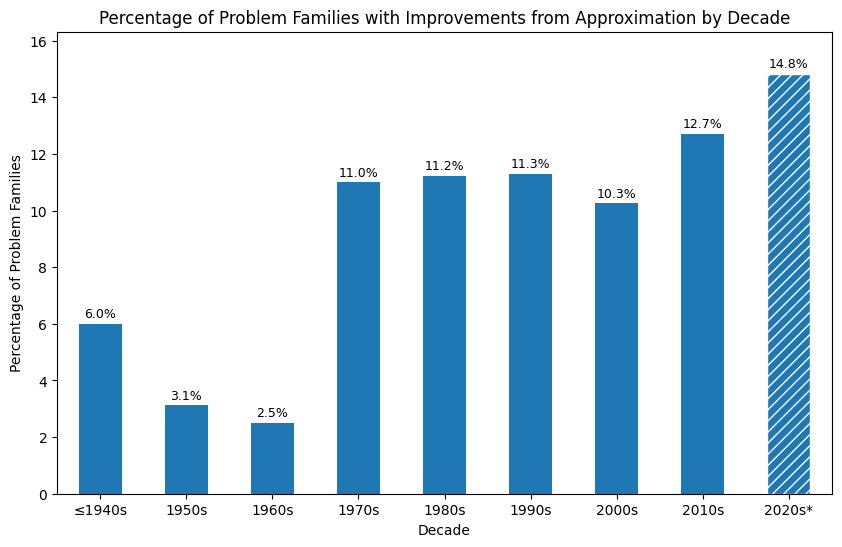

,All-Pairs Shortest Paths (APSP),Cardinality Estimation,Closest Pair Problem,Convex Optimization (Non-linear),Determinant of Matrices with Integer Entries,Discrete Fourier Transform,Eigenvalues (Iterative Methods),LU Decomposition,Linear System,Link Analysis,...,SDD Systems Solvers,Sorting,The Set-Covering Problem,The Subset-Sum Problem,The Traveling-Salesman Problem,The Vertex Cover Problem,Wiener Index,Total,Cumulative Unique Families,Total Percentage
Year,,,,,,,,,,,,,,,,,,,,,
1940.0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,3,50,6.000000
1950.0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2,64,3.125000
1960.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2,80,2.500000
1970.0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,1,1,1,0,11,100,11.000000
1980.0,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,1,1,0,12,107,11.214953
1990.0,1,0,0,1,1,1,1,0,0,0,...,1,0,0,0,1,1,0,13,115,11.304348
2000.0,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,12,117,10.256410
2010.0,1,1,1,0,1,0,0,1,0,1,...,0,1,0,1,1,1,1,15,118,12.711864
2020.0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,7,118,14.830508


In [13]:
# Plot number of improvements by Family by decade
data = approximation_algorithms.copy()

data.loc[data['Year'] < 1940, 'Year'] = 1940


# drop column Family Name
# reset index
data = data[data['Improvement'] == 1]
data = data[data['sheet1'] != 1]

# group by family name
data = data.groupby(['Year', 'Family Name']).size().unstack().fillna(0)

data = data.groupby(data.index // 10 * 10).sum()
data = data.applymap(lambda x: 1 if x > 0 else 0)
data['Total'] = data.sum(axis=1)
data
total_families = approximation_algorithms.copy()
total_families.loc[total_families['Year'] < 1940, 'Year'] = 1940

# group by decade
total_families['Decade'] = (total_families['Year'] // 10) * 10

unique_families = set()
cumulative_counts = []

for decade, group in total_families.groupby('Decade'):
    unique_families.update(group['Family Name'])
    cumulative_counts.append({'Decade': decade, 'Cumulative Unique Families': len(unique_families)})

total_families = pd.DataFrame(cumulative_counts)

data = data.join(total_families.set_index('Decade'))

data['Total Percentage'] = data['Total'] / data['Cumulative Unique Families'] * 100


# multiply 2020 by 2.5
data['Total Percentage'].loc[2020] = data['Total Percentage'].loc[2020] * 2.5



# plot total per decade bar chart
fig, ax = plt.subplots()

data['Total Percentage'].plot(kind='bar', ax=ax)

# data

fig.set_size_inches(10, 6)
plt.xticks(rotation=0)

plt.margins(x=0.01, y=0.1)

# hatch last bar
ax.patches[-1].set_hatch('///')

ax.patches[-1].set_edgecolor('white')

ax.set_xlabel('Decade')
ax.set_xticklabels(['≤1940s'] + ['2020s*' if year == 2020 else f'{year:.0f}s'  for year in data.index[1:]])

# add percentage to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x()  + p.get_width() / 2., p.get_height() + 0.1),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set_ylabel('Percentage of Problem Families')
ax.set_title('Percentage of Problem Families with Improvements from Approximation by Decade')
plt.show()
data
# New Graph

In [5]:
total_families

,Decade,Cumulative Unique Families
0,1940.0,50
1,1950.0,64
2,1960.0,80
3,1970.0,100
4,1980.0,107
5,1990.0,115
6,2000.0,117
7,2010.0,118
8,2020.0,118


In [6]:
data

,All-Pairs Shortest Paths (APSP),Cardinality Estimation,Closest Pair Problem,Convex Optimization (Non-linear),Determinant of Matrices with Integer Entries,Discrete Fourier Transform,Eigenvalues (Iterative Methods),LU Decomposition,Linear System,Link Analysis,...,SDD Systems Solvers,Sorting,The Set-Covering Problem,The Subset-Sum Problem,The Traveling-Salesman Problem,The Vertex Cover Problem,Wiener Index,Total,Cumulative Unique Families,Total Percentage
Year,,,,,,,,,,,,,,,,,,,,,
1940.0,0.0,0,0,0,0,0,1,0,1.0,0,...,0,0,0,0,0.0,0.0,0,3.0,50,6.000000
1950.0,0.0,0,0,1,0,0,0,0,1.0,0,...,0,0,0,0,0.0,0.0,0,2.0,64,3.125000
1960.0,0.0,0,0,1,0,0,0,0,0.0,0,...,0,0,0,0,1.0,0.0,0,2.0,80,2.500000
1970.0,0.0,0,0,1,0,0,0,0,1.0,0,...,0,0,1,1,1.0,1.0,0,11.0,100,11.000000
1980.0,0.0,1,0,1,0,0,1,0,1.0,0,...,0,0,0,0,1.0,1.0,0,12.0,107,11.214953
1990.0,1.0,0,0,1,1,1,1,0,0.0,0,...,1,0,0,0,1.0,1.0,0,13.0,115,11.304348
2000.0,1.0,0,0,0,0,0,0,0,0.0,0,...,1,1,1,0,1.0,1.0,1,12.0,117,10.256410
2010.0,1.0,1,1,0,1,0,0,1,0.0,1,...,0,1,0,1,1.0,1.0,1,15.0,118,12.711864
2020.0,2.5,0,0,0,0,0,0,0,2.5,0,...,0,0,0,0,2.5,2.5,0,17.5,295,14.830508
